In [34]:
import pandas as pd  # pyright: ignore[reportMissingImports]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # pyright: ignore[reportMissingModuleSource]
import plotly.express as px  # pyright: ignore[reportMissingImports]
import plotly.graph_objects as go  # pyright: ignore[reportMissingImports]
import plotly.io as pio  # pyright: ignore[reportMissingImports]
from scipy import stats  # pyright: ignore[reportMissingImports]

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [35]:
df = pd.read_csv("final_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41997 entries, 0 to 41996
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO_A0                           41997 non-null  object 
 1   calendar_start_date              41997 non-null  object 
 2   dengue_total                     41997 non-null  int64  
 3   region                           41997 non-null  object 
 4   year                             41997 non-null  int64  
 5   month                            41997 non-null  int64  
 6   quarter                          41997 non-null  int64  
 7   day_of_year                      41997 non-null  int64  
 8   is_rainy_season                  41997 non-null  int64  
 9   month_sin                        41997 non-null  float64
 10  month_cos                        41997 non-null  float64
 11  day_of_year_sin                  41997 non-null  float64
 12  day_of_year_cos   

In [36]:
df.head()

,ISO_A0,calendar_start_date,dengue_total,region,year,month,quarter,day_of_year,is_rainy_season,month_sin,...,temp_min,temp_max,humidity,pressure,wind_speed,rainfall,temp_optimal,temp_too_cold,temp_too_hot,humidity_high
0,BGD,1980-01-01,4,SEARO,1980,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
1,BGD,1985-01-01,0,SEARO,1985,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
2,BGD,1986-01-01,0,SEARO,1986,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
3,BGD,1987-01-01,0,SEARO,1987,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
4,BGD,1988-01-01,0,SEARO,1988,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0


In [37]:
# ============================================================================
# WEEKLY DATA VISUALIZATION
# ============================================================================

# Convert date column to datetime
df['calendar_start_date'] = pd.to_datetime(df['calendar_start_date'])

# Create week identifier (Year-Week)
df['year_week'] = df['calendar_start_date'].dt.strftime('%Y-W%U')
df['year_week_date'] = df['calendar_start_date'].dt.to_period('W').dt.start_time

print("=" * 70)
print("WEEKLY DENGUE OUTBREAK DATA VISUALIZATION")
print("=" * 70)
print(f"\nData loaded: {len(df):,} records")
print(f"Date range: {df['calendar_start_date'].min()} to {df['calendar_start_date'].max()}")
print(f"Countries: {df['ISO_A0'].nunique()}")
print(f"Unique weeks: {df['year_week'].nunique()}")

# Aggregate weekly data
weekly_data = df.groupby(['year_week_date', 'ISO_A0']).agg({
    'dengue_total': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'rainfall': 'mean',
    'region': 'first'
}).reset_index()

# Overall weekly aggregation (all countries combined)
weekly_overall = df.groupby('year_week_date').agg({
    'dengue_total': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'rainfall': 'mean'
}).reset_index()

print(f"\nWeekly aggregated records: {len(weekly_data):,}")
print(f"Overall weekly records: {len(weekly_overall):,}")

# Display summary
print("\n" + "=" * 70)
print("WEEKLY SUMMARY STATISTICS")
print("=" * 70)
print(f"\nTotal weekly cases (all countries): {weekly_overall['dengue_total'].sum():,}")
print(f"Average weekly cases: {weekly_overall['dengue_total'].mean():.1f}")
print(f"Max weekly cases: {weekly_overall['dengue_total'].max():,}")
print(f"\nTop 10 weeks by cases:")
print(weekly_overall.nlargest(10, 'dengue_total')[['year_week_date', 'dengue_total']]) 

WEEKLY DENGUE OUTBREAK DATA VISUALIZATION

Data loaded: 41,997 records
Date range: 1958-01-01 00:00:00 to 2025-03-01 00:00:00
Countries: 10
Unique weeks: 922

Weekly aggregated records: 2,410
Overall weekly records: 914

WEEKLY SUMMARY STATISTICS

Total weekly cases (all countries): 18,133,941
Average weekly cases: 19840.2
Max weekly cases: 473,866

Top 10 weeks by cases:
    year_week_date  dengue_total
215     2007-12-31        473866
227     2008-12-29        469947
848     2021-12-27        455901
203     2007-01-01        454623
543     2015-12-28        426101
696     2018-12-31        404065
492     2014-12-29        359658
594     2016-12-26        356330
887     2022-12-26        344993
191     2005-12-26        334981


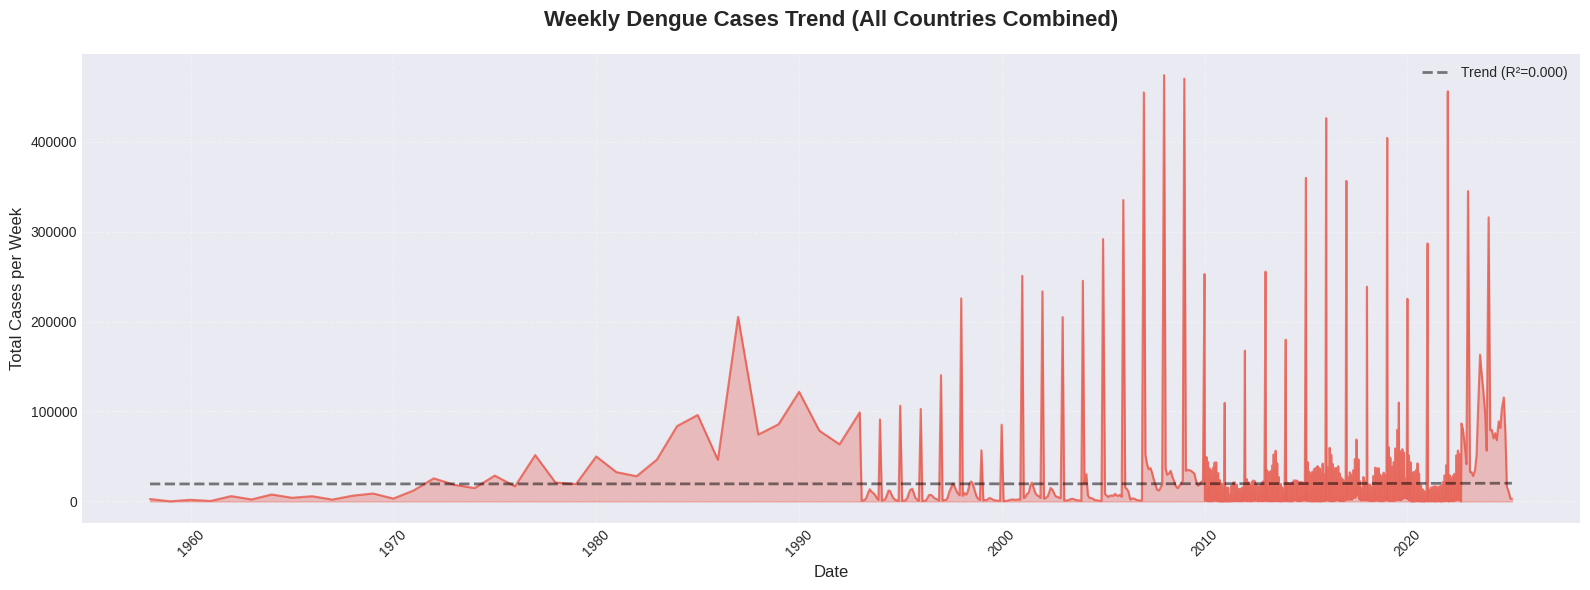

Overall trend: Increasing (slope=0.86 cases/week)


In [38]:
# ============================================================================
# VISUALIZATION 1: Overall Weekly Trend (All Countries)
# ============================================================================

plt.figure(figsize=(16, 6))
plt.plot(weekly_overall['year_week_date'], weekly_overall['dengue_total'], 
         linewidth=1.5, color='#e74c3c', alpha=0.7)
plt.fill_between(weekly_overall['year_week_date'], weekly_overall['dengue_total'], 
                 alpha=0.3, color='#e74c3c')

plt.title('Weekly Dengue Cases Trend (All Countries Combined)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases per Week', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)

# Add trend line
x_numeric = np.arange(len(weekly_overall))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x_numeric, weekly_overall['dengue_total']
)
trend_line = slope * x_numeric + intercept
plt.plot(weekly_overall['year_week_date'], trend_line, 
         '--', color='black', linewidth=2, alpha=0.5, label=f'Trend (R²={r_value**2:.3f})')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Overall trend: {'Increasing' if slope > 0 else 'Decreasing'} (slope={slope:.2f} cases/week)")


Top 5 countries by total cases: ['IDN', 'THA', 'IND', 'LKA', 'BGD']


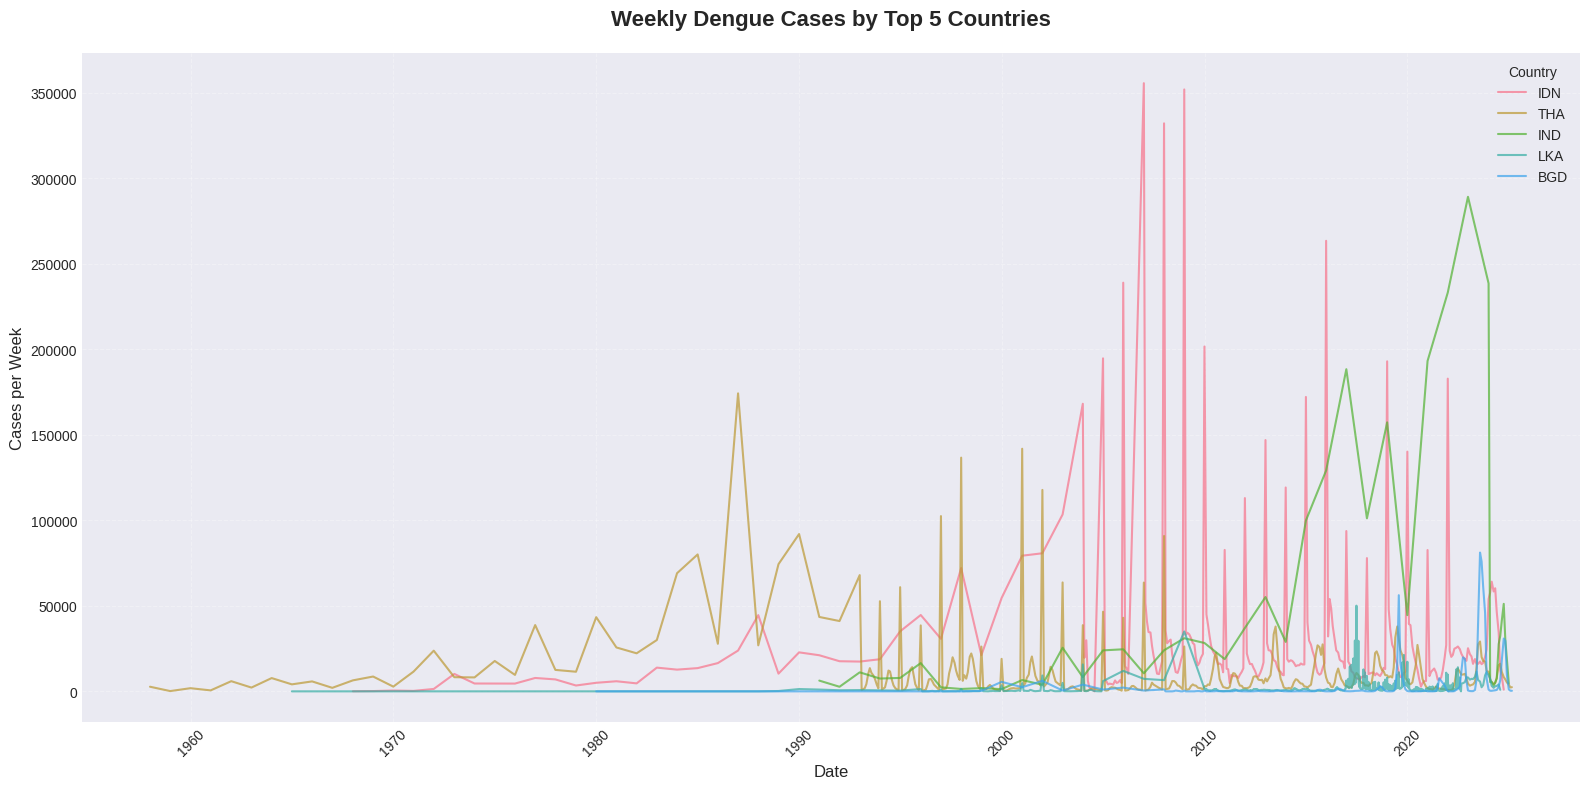

In [39]:
# ============================================================================
# VISUALIZATION 2: Weekly Trends by Top Countries
# ============================================================================

# Get top countries by total cases
top_countries = df.groupby('ISO_A0')['dengue_total'].sum().nlargest(5).index.tolist()
print(f"Top 5 countries by total cases: {top_countries}")

plt.figure(figsize=(16, 8))

for i, country in enumerate(top_countries):
    country_weekly = weekly_data[weekly_data['ISO_A0'] == country]
    plt.plot(country_weekly['year_week_date'], country_weekly['dengue_total'], 
             linewidth=1.5, alpha=0.7, label=country)

plt.title('Weekly Dengue Cases by Top 5 Countries', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cases per Week', fontsize=12)
plt.legend(title='Country', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# ============================================================================
# VISUALIZATION 3: Interactive Plotly - Weekly Cases by Country
# ============================================================================

fig = px.line(weekly_data, 
              x='year_week_date', 
              y='dengue_total',
              color='ISO_A0',
              title='Interactive Weekly Dengue Cases by Country',
              labels={'year_week_date': 'Date', 
                     'dengue_total': 'Cases per Week',
                     'ISO_A0': 'Country'},
              hover_data=['region', 'temperature', 'rainfall'])

fig.update_layout(
    height=600,
    hovermode='x unified',
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

fig.show()
print("Interactive plot displayed above. Hover to see details!")


Interactive plot displayed above. Hover to see details!


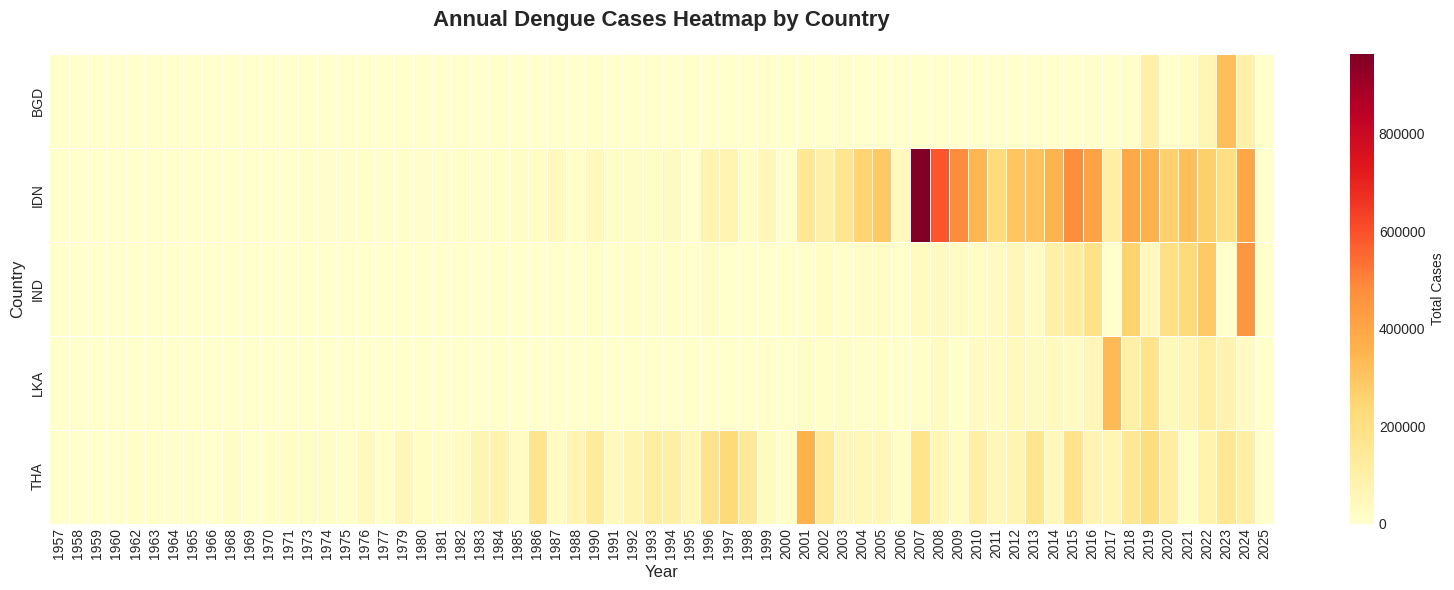


Heatmap shows annual totals. Darker colors = more cases.


In [41]:
# ============================================================================
# VISUALIZATION 4: Heatmap - Weekly Cases by Country and Year
# ============================================================================

# Create year-week matrix
weekly_data['year'] = pd.to_datetime(weekly_data['year_week_date']).dt.year
weekly_data['week'] = pd.to_datetime(weekly_data['year_week_date']).dt.isocalendar().week

# Pivot for heatmap (top countries only)
heatmap_data = weekly_data[weekly_data['ISO_A0'].isin(top_countries)].pivot_table(
    index='ISO_A0',
    columns='year',
    values='dengue_total',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, 
            annot=False, 
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Total Cases'},
            linewidths=0.5)

plt.title('Annual Dengue Cases Heatmap by Country', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

print("\nHeatmap shows annual totals. Darker colors = more cases.")


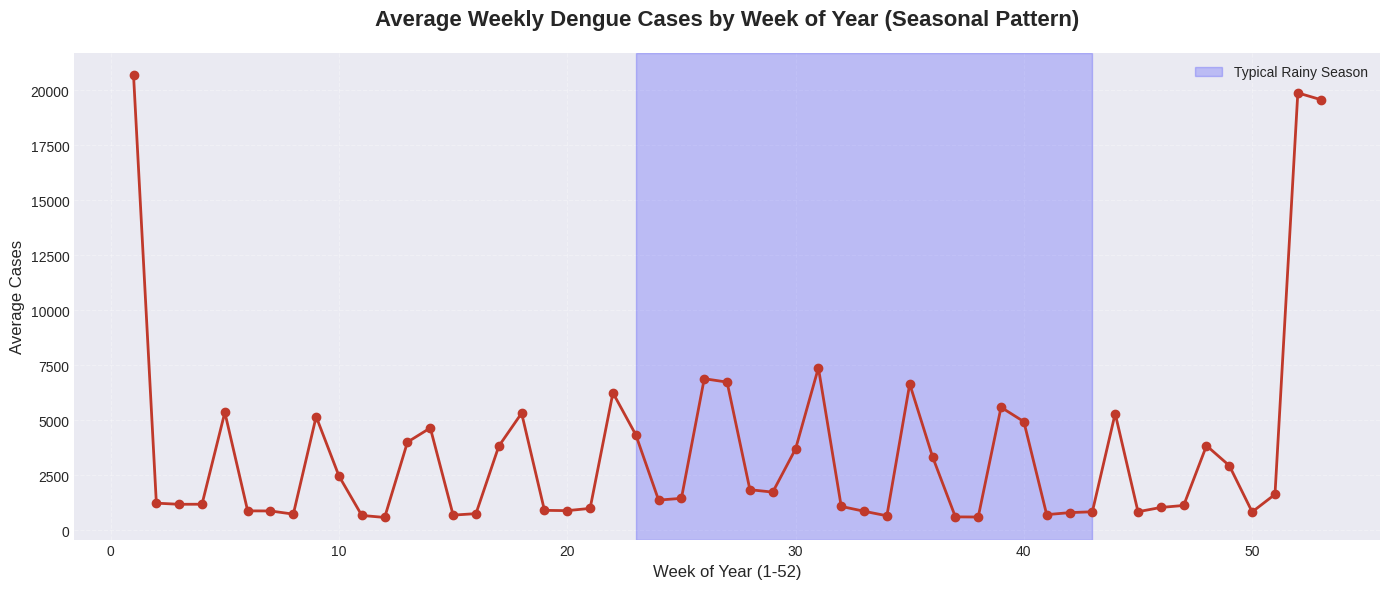


Shows seasonal pattern - higher cases during rainy season (weeks 23-43)


In [42]:
# ============================================================================
# VISUALIZATION 5: Seasonal Pattern - Average Cases by Week of Year
# ============================================================================

# Extract week of year (1-52)
weekly_data['week_of_year'] = pd.to_datetime(weekly_data['year_week_date']).dt.isocalendar().week

# Average cases by week of year (across all years)
seasonal_weekly = weekly_data.groupby('week_of_year')['dengue_total'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(seasonal_weekly['week_of_year'], seasonal_weekly['dengue_total'], 
         marker='o', linewidth=2, markersize=6, color='#c0392b')

plt.title('Average Weekly Dengue Cases by Week of Year (Seasonal Pattern)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Week of Year (1-52)', fontsize=12)
plt.ylabel('Average Cases', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Highlight rainy season (weeks 23-43, roughly Jun-Oct)
plt.axvspan(23, 43, alpha=0.2, color='blue', label='Typical Rainy Season')
plt.legend()

plt.tight_layout()
plt.show()

print("\nShows seasonal pattern - higher cases during rainy season (weeks 23-43)")


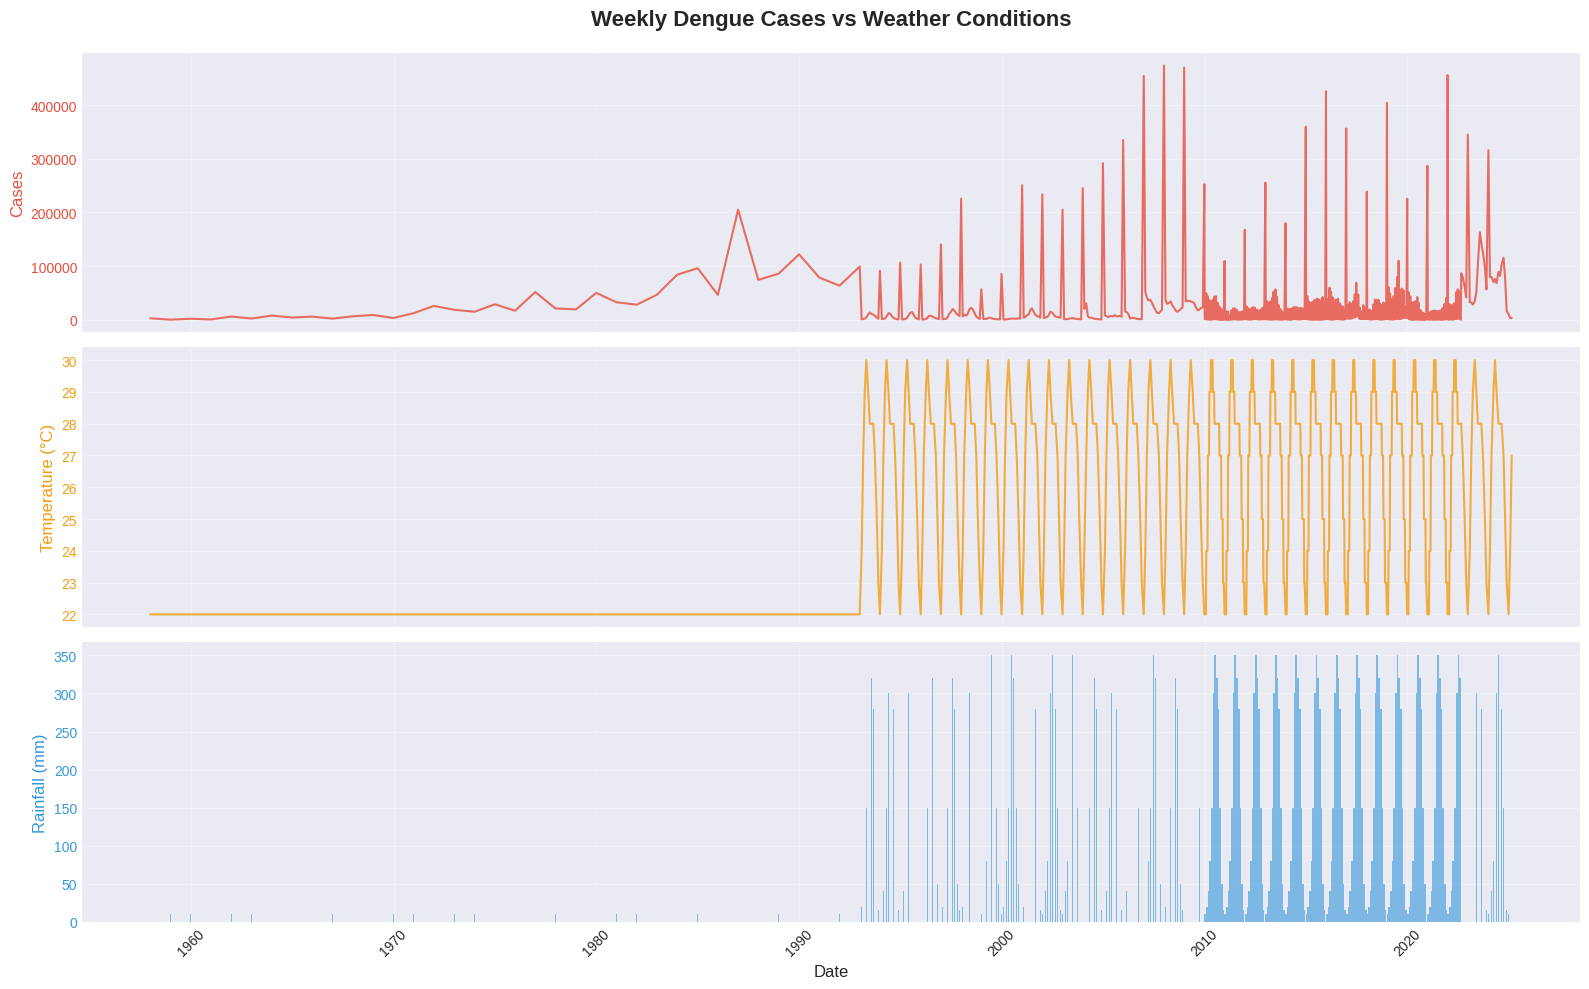


Shows relationship between cases, temperature, and rainfall over time


In [43]:
# ============================================================================
# VISUALIZATION 6: Weekly Cases vs Weather (Temperature & Rainfall)
# ============================================================================

fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)

# Cases
axes[0].plot(weekly_overall['year_week_date'], weekly_overall['dengue_total'], 
            color='#e74c3c', linewidth=1.5, alpha=0.8)
axes[0].set_ylabel('Cases', fontsize=12, color='#e74c3c')
axes[0].tick_params(axis='y', labelcolor='#e74c3c')
axes[0].set_title('Weekly Dengue Cases vs Weather Conditions', 
                  fontsize=16, fontweight='bold', pad=20)
axes[0].grid(True, alpha=0.3)

# Temperature
axes[1].plot(weekly_overall['year_week_date'], weekly_overall['temperature'], 
            color='#f39c12', linewidth=1.5, alpha=0.8)
axes[1].set_ylabel('Temperature (°C)', fontsize=12, color='#f39c12')
axes[1].tick_params(axis='y', labelcolor='#f39c12')
axes[1].grid(True, alpha=0.3)

# Rainfall
axes[2].bar(weekly_overall['year_week_date'], weekly_overall['rainfall'], 
           color='#3498db', alpha=0.6, width=7)
axes[2].set_ylabel('Rainfall (mm)', fontsize=12, color='#3498db')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].tick_params(axis='y', labelcolor='#3498db')
axes[2].grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nShows relationship between cases, temperature, and rainfall over time")


In [44]:
# ============================================================================
# VISUALIZATION 7: Weekly Summary Table
# ============================================================================

# Create comprehensive weekly summary
weekly_summary = weekly_overall.copy()
weekly_summary['year'] = pd.to_datetime(weekly_summary['year_week_date']).dt.year
weekly_summary['month'] = pd.to_datetime(weekly_summary['year_week_date']).dt.month

# Group by year and month for monthly summary
monthly_summary = df.groupby([df['calendar_start_date'].dt.to_period('M'), 'ISO_A0']).agg({
    'dengue_total': 'sum'
}).reset_index()
monthly_summary.columns = ['month', 'ISO_A0', 'dengue_total']
monthly_summary['month'] = monthly_summary['month'].astype(str)

print("=" * 70)
print("WEEKLY DATA SUMMARY")
print("=" * 70)
print(f"\nTotal weeks in dataset: {len(weekly_overall)}")
print(f"Average cases per week: {weekly_overall['dengue_total'].mean():.1f}")
print(f"Median cases per week: {weekly_overall['dengue_total'].median():.1f}")
print(f"Std deviation: {weekly_overall['dengue_total'].std():.1f}")

print("\n" + "=" * 70)
print("TOP 20 WEEKS BY CASES")
print("=" * 70)
top_weeks = weekly_overall.nlargest(20, 'dengue_total')
print(top_weeks[['year_week_date', 'dengue_total', 'temperature', 'rainfall']].to_string(index=False))

# Export weekly summary
weekly_overall.to_csv('weekly_summary.csv', index=False)
print(f"\n✅ Weekly summary exported to 'weekly_summary.csv'")


WEEKLY DATA SUMMARY

Total weeks in dataset: 914
Average cases per week: 19840.2
Median cases per week: 1618.5
Std deviation: 54881.8

TOP 20 WEEKS BY CASES
year_week_date  dengue_total  temperature  rainfall
    2007-12-31        473866         22.0      10.0
    2008-12-29        469947         22.0      10.0
    2021-12-27        455901         22.0      10.0
    2007-01-01        454623         22.0      10.0
    2015-12-28        426101         22.0      10.0
    2018-12-31        404065         22.0      10.0
    2014-12-29        359658         22.0      10.0
    2016-12-26        356330         22.0      10.0
    2022-12-26        344993         22.0      10.0
    2005-12-26        334981         22.0      10.0
    2024-01-01        315844         22.0      10.0
    2004-12-27        291700         22.0      10.0
    2020-12-28        286771         22.0      10.0
    2012-12-31        255407         22.0      10.0
    2009-12-28        252772         22.0      10.0
    2001-01